### Import Libraries

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from joblib import dump, load
from sklearn.metrics import accuracy_score, precision_score

In [24]:
churn_data = pd.read_csv('customer_churn_dataset.csv')
churn_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [25]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,64374.0,32187.500000,18583.317451,1.0,16094.25,32187.5,48280.75,64374.0
Age,64374.0,41.970982,13.924911,18.0,30.00,42.0,54.00,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.00,33.0,47.00,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.00,15.0,23.00,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.00,6.0,8.00,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.00,19.0,25.00,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.00,534.0,768.00,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.00,15.0,23.00,30.0
Churn,64374.0,0.473685,0.499311,0.0,0.00,0.0,1.00,1.0


In [26]:
n_data = churn_data.dropna()

In [27]:
n_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,64374.0,32187.500000,18583.317451,1.0,16094.25,32187.5,48280.75,64374.0
Age,64374.0,41.970982,13.924911,18.0,30.00,42.0,54.00,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.00,33.0,47.00,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.00,15.0,23.00,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.00,6.0,8.00,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.00,19.0,25.00,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.00,534.0,768.00,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.00,15.0,23.00,30.0
Churn,64374.0,0.473685,0.499311,0.0,0.00,0.0,1.00,1.0


### Data Visualization

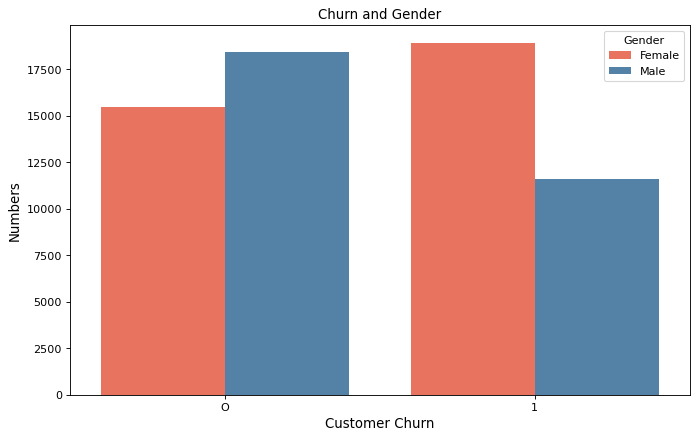

In [28]:
data = n_data[['Churn', 'Gender']]
grouped_data = data.groupby(['Churn', 'Gender']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
grouped_data['Churn'] = grouped_data['Churn'].replace({0: 'O', 1: '1'})
grouped_data['Gender'] = grouped_data['Gender'].replace({0: 'Male', 1: 'Female'})

sns.barplot(x='Churn', y='Counts', hue='Gender', data=grouped_data, palette=['#FF6347', '#4682B4'])
ax.set_title('Churn and Gender')
ax.set_ylabel('Numbers', size=12)
ax.set_xlabel('Customer Churn', size=12)
plt.show()


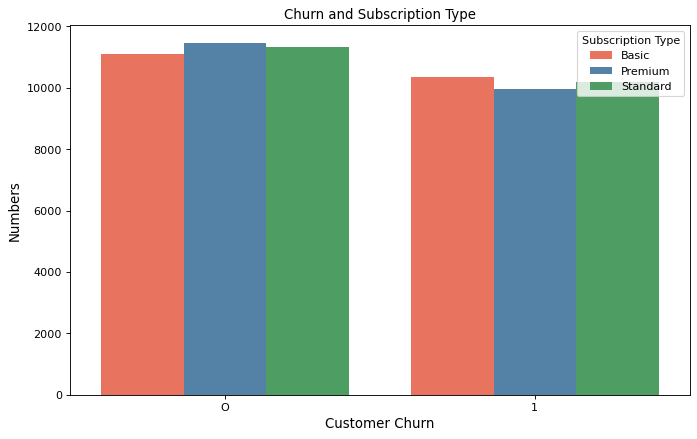

In [29]:
data = n_data[['Churn', 'Subscription Type']]
grouped_data = data.groupby(['Churn', 'Subscription Type']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
grouped_data['Churn'] = grouped_data['Churn'].replace({0: 'O', 1: '1'})
grouped_data['Subscription Type'] = grouped_data['Subscription Type'].replace({0: 'Basic', 1: 'Standard', 2: 'Premium'})

sns.barplot(x='Churn', y='Counts', hue='Subscription Type', data=grouped_data, palette=['#FF6347', '#4682B4', '#41ab5d'])
ax.set_title('Churn and Subscription Type')
ax.set_ylabel('Numbers', size=12)
ax.set_xlabel('Customer Churn', size=12)
plt.show()


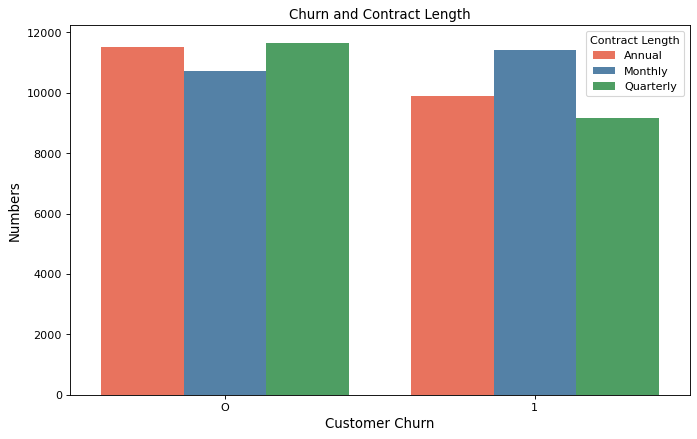

In [30]:
data = n_data[['Churn', 'Contract Length']]
grouped_data = data.groupby(['Churn', 'Contract Length']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
grouped_data['Churn'] = grouped_data['Churn'].replace({0: 'O', 1: '1'})
grouped_data['Contract Length'] = grouped_data['Contract Length'].replace({0: 'Monthly', 1: 'Annual', 2: 'Quarterly'})

sns.barplot(x='Churn', y='Counts', hue='Contract Length', data=grouped_data, palette=['#FF6347', '#4682B4', '#41ab5d'])
ax.set_title('Churn and Contract Length')
ax.set_ylabel('Numbers', size=12)
ax.set_xlabel('Customer Churn', size=12)
plt.show()


### Separate input and output features

In [31]:
x = churn_data.drop(columns=['Churn'])
y = churn_data['Churn']

In [32]:
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']
encoder = BinaryEncoder()
x_encoded = encoder.fit_transform(x[categorical_features])
x = x.drop(categorical_features, axis=1)
x = x.reset_index(drop=True)
x_encoded = x_encoded.reset_index(drop=True)
x = pd.concat([x, x_encoded], axis=1)

In [33]:
imputer = SimpleImputer(strategy='mean')
x_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Apply SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x_imputed, y)

In [34]:
y.value_counts()

Churn
1    33881
0    33881
Name: count, dtype: int64

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .25, random_state=42)

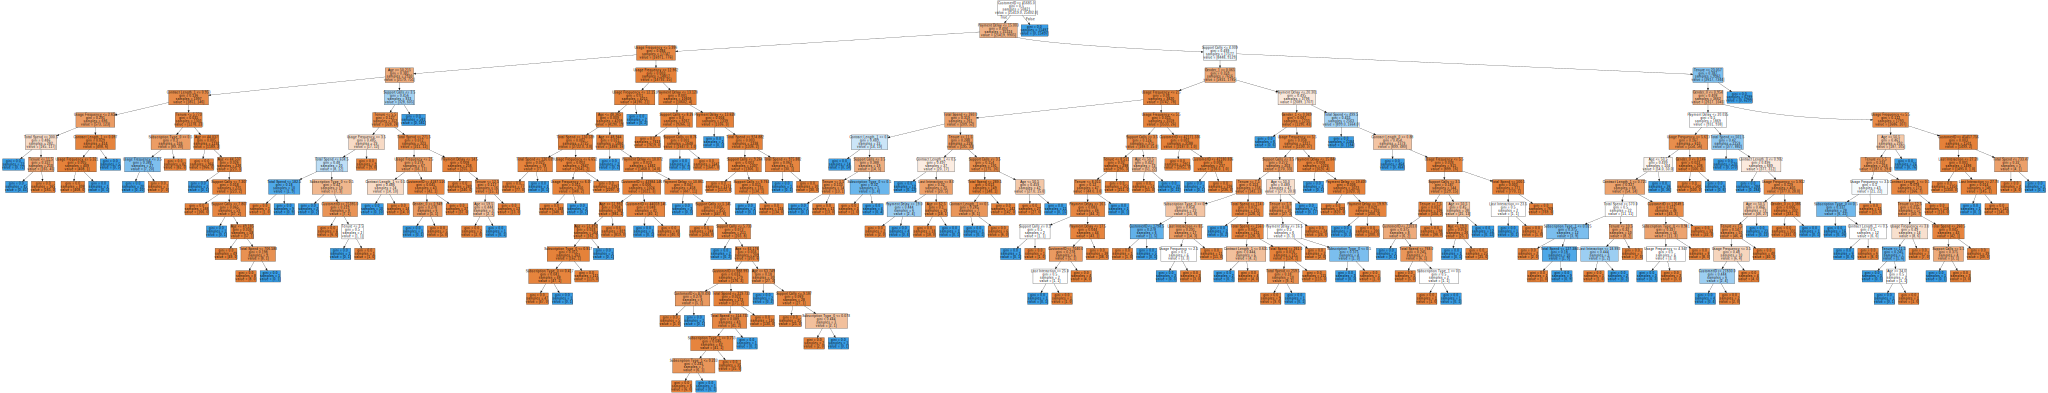

In [36]:
dcs = DecisionTreeClassifier()
dcs.fit(x_train, y_train)
export_graphviz(dcs, out_file='tree.dot', filled=True, feature_names=x_train.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph) 

# save model
# dump(dcs, "decision_tree_model.joblib")

In [37]:
dcs_prediction = dcs.predict(x_test)
dcs_accuracy = accuracy_score(dcs_prediction, y_test)
dcs_precision = precision_score(dcs_prediction, y_test)

print(f"Accuracy: {dcs_accuracy*100}")
print(f"Precision: {dcs_precision*100}")

Accuracy: 99.69895519744998
Precision: 99.64618469159099


In [38]:
loaded_model = load("decision_tree_model.joblib")
loaded_prediction = loaded_model.predict(x_test)